# Material de aula - FACENS - Aprendizado de Máquina


## Particle Swarm Optimization - Laboratório 04

In [7]:
#CÉLULA PSO-LIB-01
import numpy as np
import math
import matplotlib.pyplot as plt
from enum import Enum
from operator import xor
%matplotlib inline

In [8]:
#CÉLULA PSO-LIB-02
# Função para cálculo de fitness (aptidão de cada individuo)
def fitness(individual) :  
    
    #(x, y) = scale(individual)
    
    x = individual[0]
    y = individual[1]
    
    num = (np.sin(np.sqrt(x**2+y**2)))**2 - 0.5
    den = (1 + 0.001*(x**2+y**2)) ** 2
    z = 0.5 - (num / den)

    return z


In [9]:
#CÉLULA PSO-LIB-03
def plot_population(P, generation):
    
    xmin =-100
    xmax = 100
    ymin =-100
    ymax = 100
    
    xAxis = []
    yAxis = []
    for individual in P : #pega os individuos na população        
        x = individual['X']
        y = individual['Y']
        
        xAxis.append(x)
        yAxis.append(y)
    
    plt.figure()
    plt.plot(xAxis, yAxis, 'bo')
    plt.axis([xmin, xmax, ymin, ymax])
    
    plt.xlabel('x')
    plt.ylabel('y')
    sTitle = ('Populacao na geração {}'.format(generation))
    plt.title(sTitle)
    plt.grid()

In [10]:
#CÉLULA PSO-LIB-05
def calcAllPBest(vParticles) :
    vParticlesRet = []
    
    for particle in vParticles :
        x = particle['X']
        y = particle['Y']
        xBest = particle['XBest']
        yBest = particle['YBest']
        if (fitness((x,y)) >= fitness((xBest, yBest)) ) :
            particle['XBest'] = x
            particle['YBest'] = y
            
        vParticlesRet.append(particle)
    
    return vParticlesRet

In [11]:
#CÉLULA PSO-LIB-06
# Verifica o gbest
def calcGBest(vParticles) :
    #Inicializa variavel
    calcAllPBest(vParticles)
    x = vParticles[0]['XBest']
    y = vParticles[0]['YBest']
    maxFitness = fitness((x,y))

    for particle in vParticles :
        x = particle['XBest']
        y = particle['YBest']
        currentFitness = fitness((x,y))
        if ( currentFitness >= maxFitness ) :
            maxFitness = currentFitness
            gBest = {'X' : x, 'Y' : y, 'Fitness' : maxFitness}
    
    return gBest

In [12]:
#CÉLULA PSO-LIB-07
def calcPBest(particle) :   
    x = particle['X']
    y = particle['Y']
    xBest = particle['XBest']
    yBest = particle['YBest']
    currentFitness = fitness((x,y))
    if (currentFitness >= fitness((xBest, yBest)) ) :
        xBest = x
        yBest = y
                
    return (xBest, yBest)

# PSO - inicio

# 1 - Criando o enxame de partículas

Utilizando Jupyter e NumPy: escreva a função que cria um enxame de partículas inicial com valores aleatórios no domínio do espaço de busca.

Domínio da função: 
- xmin = -100
- xmax =  100
- ymin = -100
- xmax =  100

In [13]:
#CÉLULA PSO-MAIN-01
#Parâmetros
size_pop   = 100
max_generations = 100
stop_condition = 0.95

#Limites do dominio de definição
x_min = -100
x_max =  100

y_min = -100
y_max =  100


# Cada particula tem dados (X,Y, XBest, YBest)
gBest = {'X' : 0, 'Y' : 0, 'Fitness' : 0}
vParticles = []

deltaT = 1
c1 = 0.2
c2 = 0.3
w  = 0.2

vMax = 500 #limitação de velocidade

#r1 e r2 deverão ser extraídas de uma distribuição uniforme e são atualizadas a cada cálculo de velocidade da população
#as melhores posições, individual e global, são obtidas através da função de fitness

In [14]:
#CÉLULA PSO-MAIN-02
#Inicializando população
vParticles=[]

for i in range (0, size_pop):
    x = x_min + np.random.random() * (x_max - x_min)
    y = y_min + np.random.random() * (x_max - x_min)
    vx = x_min + np.random.random() * (y_max - y_min) / deltaT
    vy = y_min + np.random.random() * (y_max - y_min) / deltaT
    
    vParticles.append({'X' : x, 'Y' : y, 'XBest' : x, 'YBest' : y, 'VX' : vx, 'VY' : vy})
    

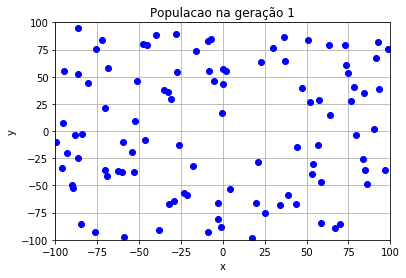

In [16]:
#Teste
plot_population(vParticles, 1) 

## Validação

plot_population(vParticles, 1)        

print(vParticles)

## Observe a disposição das particulas no dominio. Use populações menores e verifique se todas estão presentes.

In [17]:
print(vParticles)

[{'X': -30.841704576637, 'Y': 29.474347092202777, 'XBest': -30.841704576637, 'YBest': 29.474347092202777, 'VX': 11.424273710536426, 'VY': -36.04589833038405}, {'X': -86.45686375613329, 'Y': 94.54196277159073, 'XBest': -86.45686375613329, 'YBest': 94.54196277159073, 'VX': -29.843040192832476, 'VY': -59.54252375776385}, {'X': -84.31903813967094, 'Y': -2.27856952555922, 'XBest': -84.31903813967094, 'YBest': -2.27856952555922, 'VX': 93.65461500309002, 'VY': -4.775331524659677}, {'X': -90.36865901270453, 'Y': -49.48164040374565, 'XBest': -90.36865901270453, 'YBest': -49.48164040374565, 'VX': 86.66475523157362, 'VY': -95.47913122753052}, {'X': -46.65034979101812, 'Y': -8.207289812324504, 'XBest': -46.65034979101812, 'YBest': -8.207289812324504, 'VX': -85.34115540299858, 'VY': -25.3766802085089}, {'X': -0.6760364491548359, 'Y': 16.43780854659633, 'XBest': -0.6760364491548359, 'YBest': 16.43780854659633, 'VX': 80.9251855823604, 'VY': 0.004380205742478438}, {'X': -95.64137435597921, 'Y': 7.4480